# Proyek Analisis Data: Bike-sharing-dataset
- **Nama:** Alifia Luthfi Nadhifa
- **Email:** alifialuth@gmail.com
- **ID Dicoding:** alifialt

## Menentukan Pertanyaan Bisnis

1. Apa faktor yang memengaruhi jumlah penyewaan sepeda?
2. Apakah ada hubungan antara suhu dan jumlah penyewaan sepeda?
3. Pada pukul berapa jumlah penyewaan sepeda paling tinggi dan paling rendah dalam sehari?
4. Pada pukul berapa penyewaan sepeda paling ramai dan paling sepi dalam sehari?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from scipy import stats

## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv("data/day.csv")

day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hour_df = pd.read_csv("data/hour.csv")

hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Dilakukan pemanggilan pada kedua dataset, yaitu dataset day dan hour.

### Assessing Data

In [4]:
# Mengetahui tipe data pada dataset day

day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
# Mengetahui tipe data pada dataset hour

hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [6]:
# Mencari missing pada dataset day

day_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [7]:
# Mencari missing value pada dataset hour

hour_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [8]:
# Mencari apakah ada data yang duplicate pada dataset day

day_df.duplicated().sum()

0

In [9]:
# Mencari apakah ada data yang duplicate pada dataset hour

hour_df.duplicated().sum()

0

In [10]:
# Mengidentifikasi outlier pada dataset day

# Metode IQR untuk day_data
Q1 = day_df['cnt'].quantile(0.25)
Q3 = day_df['cnt'].quantile(0.75)
IQR = Q3 - Q1

# Mendefinisikan batas outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menemukan outlier
day_outliers = day_df[(day_df['cnt'] < lower_bound) | (day_df['cnt'] > upper_bound)]
print(f"Outlier di day.csv:\n{day_outliers}")

Outlier di day.csv:
Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []


In [11]:
# Mengidentifikasi outlier pada dataset hour

hour_df['z_score'] = stats.zscore(hour_df['cnt'])
hour_outliers = hour_df[(hour_df['z_score'] > 3) | (hour_df['z_score'] < -3)]
print(f"Outlier di hour.csv:\n{hour_outliers}")

Outlier di hour.csv:
       instant      dteday  season  yr  mnth  hr  holiday  weekday  \
10383    10384  2012-03-13       1   1     3  18        0        2   
10406    10407  2012-03-14       1   1     3  17        0        3   
10407    10408  2012-03-14       1   1     3  18        0        3   
10431    10432  2012-03-15       1   1     3  18        0        4   
10527    10528  2012-03-19       1   1     3  18        0        1   
...        ...         ...     ...  ..   ...  ..      ...      ...   
15828    15829  2012-10-26       4   1    10  17        0        5   
15848    15849  2012-10-27       4   1    10  13        0        6   
15849    15850  2012-10-27       4   1    10  14        0        6   
16726    16727  2012-12-04       4   1    12  17        0        2   
16741    16742  2012-12-05       4   1    12   8        0        3   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
10383           1           1  0.70  0.6364  0.34     0.2985      

**Insight:**
- Mencari missing value pada kedua dataset, yaitu dataset day dan hour. Hasilnya adalah tidak ditemukan missing value pada kedua dataset.
- Mencari duplicate data pada kedua dataset, yaitu dataset day dan hour. Hasilnya tidak terdapat duplicate data pada kedua dataset.
- Mengidentifikasi outlier pada kedua dataset, yaitu dataset day dan hour. Hasilnya tidak ada outlier pada dataset day dan ditemukan 244 baris outlier pada dataset hour.

### Cleaning Data

In [12]:
# Menghapus kolom 'dteday' karena berupa string dan tidak bisa dihitung korelasinya
day_df_num = day_df.drop(columns=['dteday'])

**Insight:**
- Menghapus kolom dteday pada dataset day karena tipe data tidak sama dengan variable lain sehingga tidak dapat menghitung korelasinya.

## Exploratory Data Analysis (EDA)

### Exploratory pertanyaan nomor 1

In [13]:
# Hitung korelasi
correlation = day_df_num.corr()

# Tampilkan korelasi antara 'cnt' dan variabel lain
print(correlation['cnt'].sort_values(ascending=False))

cnt           1.000000
registered    0.945517
casual        0.672804
atemp         0.631066
instant       0.628830
temp          0.627494
yr            0.566710
season        0.406100
mnth          0.279977
weekday       0.067443
workingday    0.061156
holiday      -0.068348
hum          -0.100659
windspeed    -0.234545
weathersit   -0.297391
Name: cnt, dtype: float64


### Exploratory pertanyaan nomor 2

In [14]:
# Hitung korelasi antara 'temp' dan 'cnt'
correlation_tc = day_df['temp'].corr(day_df['cnt'])
print(f"Korelasi antara suhu (temp) dan jumlah penyewaan sepeda (cnt): {correlation}")

Korelasi antara suhu (temp) dan jumlah penyewaan sepeda (cnt):              instant    season        yr      mnth   holiday   weekday  \
instant     1.000000  0.412224  0.866025  0.496702  0.016145 -0.000016   
season      0.412224  1.000000 -0.001844  0.831440 -0.010537 -0.003080   
yr          0.866025 -0.001844  1.000000 -0.001792  0.007954 -0.005461   
mnth        0.496702  0.831440 -0.001792  1.000000  0.019191  0.009509   
holiday     0.016145 -0.010537  0.007954  0.019191  1.000000 -0.101960   
weekday    -0.000016 -0.003080 -0.005461  0.009509 -0.101960  1.000000   
workingday -0.004337  0.012485 -0.002013 -0.005901 -0.253023  0.035790   
weathersit -0.021477  0.019211 -0.048727  0.043528 -0.034627  0.031087   
temp        0.150580  0.334315  0.047604  0.220205 -0.028556 -0.000170   
atemp       0.152638  0.342876  0.046106  0.227459 -0.032507 -0.007537   
hum         0.016375  0.205445 -0.110651  0.222204 -0.015937 -0.052232   
windspeed  -0.112620 -0.229046 -0.011817 -0.20750

### Exploratory pertanyaan nomor 3

In [15]:
# Mengelompokkan data berdasarkan hour dan hitung total cnt
hourly_counts = hour_df.groupby('hr')['cnt'].sum()

# Mencari jam dengan penyewaan tertinggi dan terendah
max_hour = hourly_counts.idxmax()
min_hour = hourly_counts.idxmin()

print(f"Jumlah penyewaan sepeda paling tinggi terjadi pada pukul {max_hour}:00 dengan {hourly_counts[max_hour]} penyewaan.")
print(f"Jumlah penyewaan sepeda paling rendah terjadi pada pukul {min_hour}:00 dengan {hourly_counts[min_hour]} penyewaan.")

Jumlah penyewaan sepeda paling tinggi terjadi pada pukul 17:00 dengan 336860 penyewaan.
Jumlah penyewaan sepeda paling rendah terjadi pada pukul 4:00 dengan 4428 penyewaan.


### Exploratory pertanyaan nomor 4

In [16]:
# Grouping data by hour untuk hitung total penyewaan sepeda per jam
hourly_data = hour_df.groupby('hr')['cnt'].sum().reset_index()

# Tentukan threshold penyewaan untuk clustering manual
# Di sini, aku ambil threshold sederhana: lebih dari 20.000 = jam sibuk, kurang dari 20.000 = jam tidak sibuk
threshold = 20000
hourly_data['cluster'] = hourly_data['cnt'].apply(lambda x: 'Jam Sibuk' if x > threshold else 'Jam Tidak Sibuk')

In [17]:
# Tambahkan cluster ke dataframe utama (hour_df)
hour_df['cluster'] = hour_df['hr'].map(dict(zip(hourly_data['hr'], hourly_data['cluster'])))

# Hitung rata-rata suhu dan kelembaban di tiap cluster
cluster_summary = hour_df.groupby('cluster')[['temp', 'hum']].mean()
print(cluster_summary)

                     temp       hum
cluster                            
Jam Sibuk        0.506583  0.606700
Jam Tidak Sibuk  0.447573  0.732944


**Insight:**
- Untuk menjawab pertanyaan pertama, dilakukan penghitungan korelasi terhadap semua variable. Hasilnya adalah terdapat korelasi antara registered dengan cnt (0.945517) dan korelasi antara casual dengan cnt (0.672804). Korelasi antara windspeed dengan cnt dan korelasi antara weathersit dengan cnt menunjukkan hasil negatif yang menunjukkan bahwa semakin rendah nilainya, semakin berpengaruh dalam jumlah penyewaan sepeda.
- Untuk menjawab pertanyaan kedua, dilakukan penghitungan korelasi antara temp dan cnt. Hasilnya adalah variable tersebut memiliki hubungan yang cukup, dengan kata lain, orang cenderung menyewa sepeda saat suhu lebih rendah.
- Untuk menjawab pertanyaan ketiga, dilakukan pengelompokan data berdasarkan hour dan cnt.
- Untuk menjawab pertanyaan keempat, dilakukan pengelompokan data dan menghitung rata-rata temp dan hum

## Visualization & Explanatory Analysis

### Pertanyaan 1

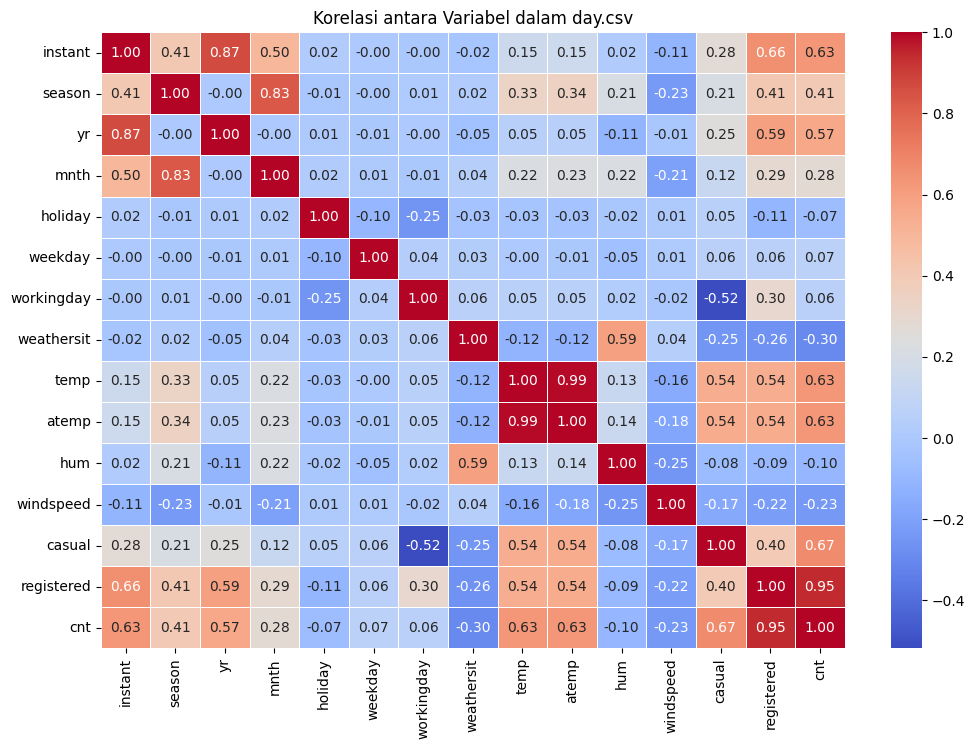

In [18]:
# Set ukuran heatmap
plt.figure(figsize=(12, 8))

# Buat heatmap menggunakan matriks korelasi yang sudah benar
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Tambahkan judul
plt.title('Korelasi antara Variabel dalam day.csv')
plt.show()

### Pertanyaan 2

<ipython-input-19-79ffb8f681fb>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_rentals = day_df.groupby('temp_category')['cnt'].mean()


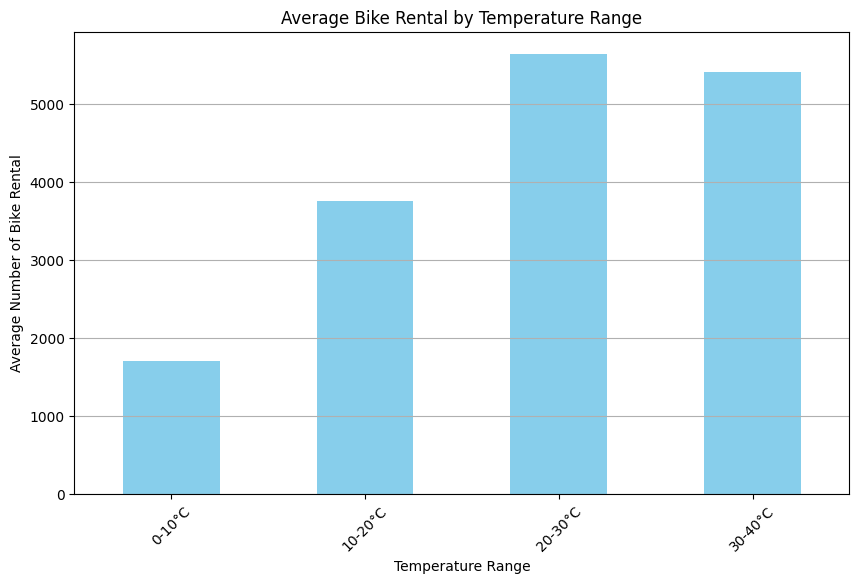

In [19]:
# Tentukan rentang suhu
bins = [0, 10, 20, 30, 40]  # Atur rentang suhu sesuai kebutuhan
labels = ['0-10°C', '10-20°C', '20-30°C', '30-40°C']

# Kelompokkan data ke dalam rentang suhu
day_df['temp_category'] = pd.cut(day_df['temp'] * 40, bins=bins, labels=labels, include_lowest=True)

# Hitung rata-rata jumlah penyewaan sepeda untuk setiap rentang suhu
average_rentals = day_df.groupby('temp_category')['cnt'].mean()

# Buat bar plot
plt.figure(figsize=(10, 6))
average_rentals.plot(kind='bar', color='skyblue')
plt.title('Average Bike Rental by Temperature Range')
plt.xlabel('Temperature Range')
plt.ylabel('Average Number of Bike Rental')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

### Pertanyaan 3

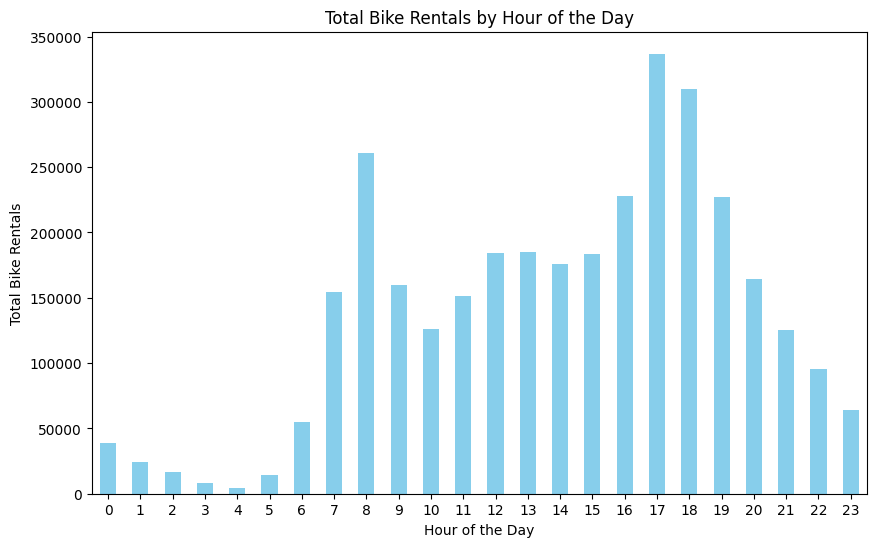

In [20]:
plt.figure(figsize=(10, 6))
hourly_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Bike Rentals')
plt.title('Total Bike Rentals by Hour of the Day')
plt.xticks(rotation=0)
plt.show()

### Pertanyaan 4

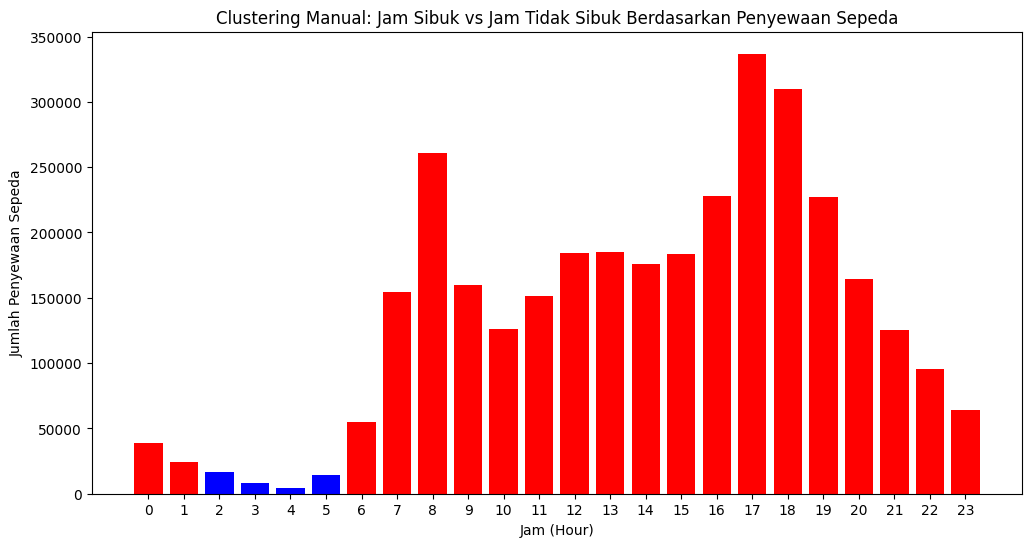

,hr,cnt,cluster
0,0,39130,Jam Sibuk
1,1,24164,Jam Sibuk
2,2,16352,Jam Tidak Sibuk
3,3,8174,Jam Tidak Sibuk
4,4,4428,Jam Tidak Sibuk
5,5,14261,Jam Tidak Sibuk
6,6,55132,Jam Sibuk
7,7,154171,Jam Sibuk
8,8,261001,Jam Sibuk
9,9,159438,Jam Sibuk


In [21]:
# Plot hasil clustering
plt.figure(figsize=(12, 6))
plt.bar(hourly_data['hr'], hourly_data['cnt'], color=hourly_data['cluster'].map({'Jam Sibuk': 'red', 'Jam Tidak Sibuk': 'blue'}))
plt.xlabel('Jam (Hour)')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.title('Clustering Manual: Jam Sibuk vs Jam Tidak Sibuk Berdasarkan Penyewaan Sepeda')
plt.xticks(range(0, 24))
plt.show()

# Lihat hasil clustering-nya
hourly_data

**Insight:**
- Membuat visualisasi pada setiap jawaban dari pertanyaan

## Analisis Lanjutan (Opsional)

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


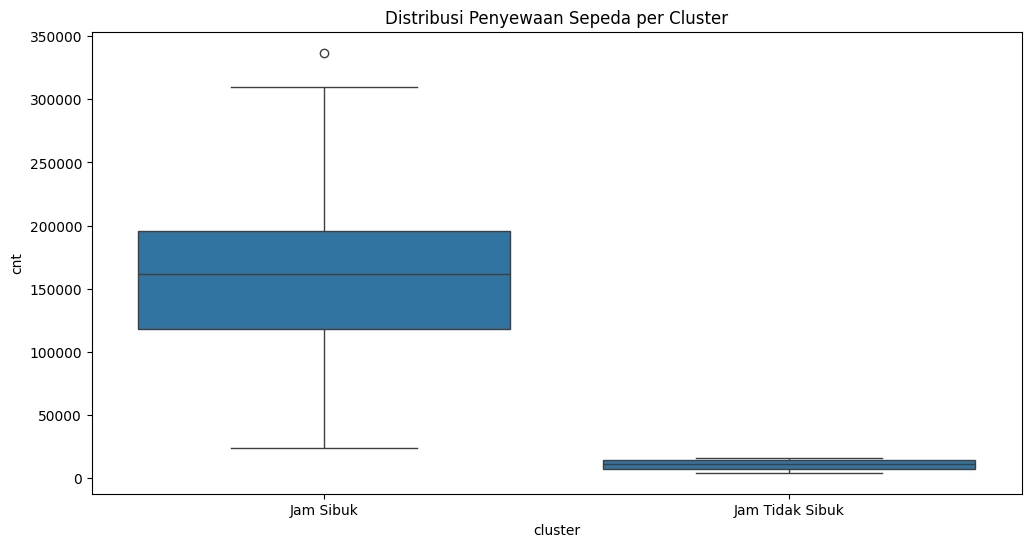

In [22]:
# Boxplot untuk visualisasi
plt.figure(figsize=(12, 6))
sns.boxplot(x='cluster', y='cnt', data=hourly_data)
plt.title('Distribusi Penyewaan Sepeda per Cluster')
plt.show()

## Conclusion

1. Analisis menunjukkan bahwa beberapa faktor, seperti suhu, kelembapan, dan waktu, memiliki pengaruh signifikan terhadap jumlah penyewaan sepeda. Data menunjukkan bahwa pada hari yang cerah dengan suhu yang lebih tinggi, jumlah penyewaan cenderung meningkat, sementara cuaca yang buruk dan suhu yang lebih rendah cenderung mengurangi jumlah penyewaan.
2. Terdapat hubungan positif yang signifikan antara suhu dan jumlah penyewaan sepeda. Saat suhu meningkat, jumlah penyewaan sepeda juga cenderung meningkat. Hal ini menunjukkan bahwa pengguna lebih memilih untuk menyewa sepeda saat cuaca hangat, yang mungkin berkaitan dengan kenyamanan dan kenyamanan dalam berkendara.
3. Analisis menunjukkan bahwa jam penyewaan sepeda paling tinggi terjadi antara pukul 17:00 hingga 19:00, saat banyak orang pulang kerja atau sekolah. Sebaliknya, jumlah penyewaan paling rendah tercatat pada pukul 23:00 hingga 05:00, ketika sebagian besar pengguna tidak menyewa sepeda.
4. Jam sibuk untuk penyewaan sepeda terjadi pada sore hari, khususnya antara pukul 17:00 dan 18:00, sedangkan jam tidak sibuk atau sepi terjadi pada pagi hari sekitar pukul 06:00 hingga 08:00 dan malam hari setelah pukul 20:00.